In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline 

from sklearn import datasets
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import cross_val_predict

In [3]:
dfs = pd.read_csv('/Users/jfreeley/GA-DSI/DSI_IMAGE/curriculum/week-03/5.1-regression-challenge/datasets/ranking-submission.csv')
dfc = pd.read_csv('/Users/jfreeley/GA-DSI/DSI_IMAGE/curriculum/week-03/5.1-regression-challenge/datasets/challenge-dataset.csv')

In [4]:
dfc.loc[dfc['income'] == '-', 'income'] = 41.0 #MEDIAN of NON-DASHES
dfc['income'] = dfc['income'].astype(float)    
dfc['international_students'] = dfc['international_students'].str.replace('%', '')
dfc.loc[dfc['international_students'].isnull(), 'international_students'] = 13
dfc['international_students'] = dfc['international_students'].astype(float)
dfc.loc[dfc['international'] == '-', 'international'] = 50.3 #MEDIAN of NON-DASHES
dfc['international'] = dfc['international'].astype(float) 
dfc['world_rank'] = pd.to_numeric(dfc['world_rank'], errors='coerce')
dfc['world_rank'].fillna(value=100, inplace=True) # *100* = MEDIAN of NON-DASHES
dfc['world_rank'] = dfc['world_rank'].astype(int)
dfc['num_students'] = dfc['num_students'].str.replace(',', '')
dfc['num_students'] = dfc.loc[:, ['num_students']].astype(float)
dfc['num_students'] = dfc.loc[:, ['num_students']].astype(float)
dfc.loc[dfc['num_students'].isnull(), 'num_students'] = 20851.0 #MEDIAN of NON-NULLS
dfc.loc[dfc['student_staff_ratio'].isnull(), 'student_staff_ratio'] = 16.1 #MEDIAN of NON-NULLS

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001 entries, 0 to 1602
Data columns (total 14 columns):
world_rank                1001 non-null int64
university_name           1001 non-null object
country                   1001 non-null object
teaching                  1001 non-null float64
international             1001 non-null float64
research                  1001 non-null float64
citations                 1001 non-null float64
income                    1001 non-null float64
total_score               1001 non-null float64
num_students              1001 non-null float64
student_staff_ratio       1001 non-null float64
international_students    1001 non-null float64
female_male_ratio         897 non-null object
year                      1001 non-null int64
dtypes: float64(9), int64(2), object(3)
memory usage: 117.3+ KB


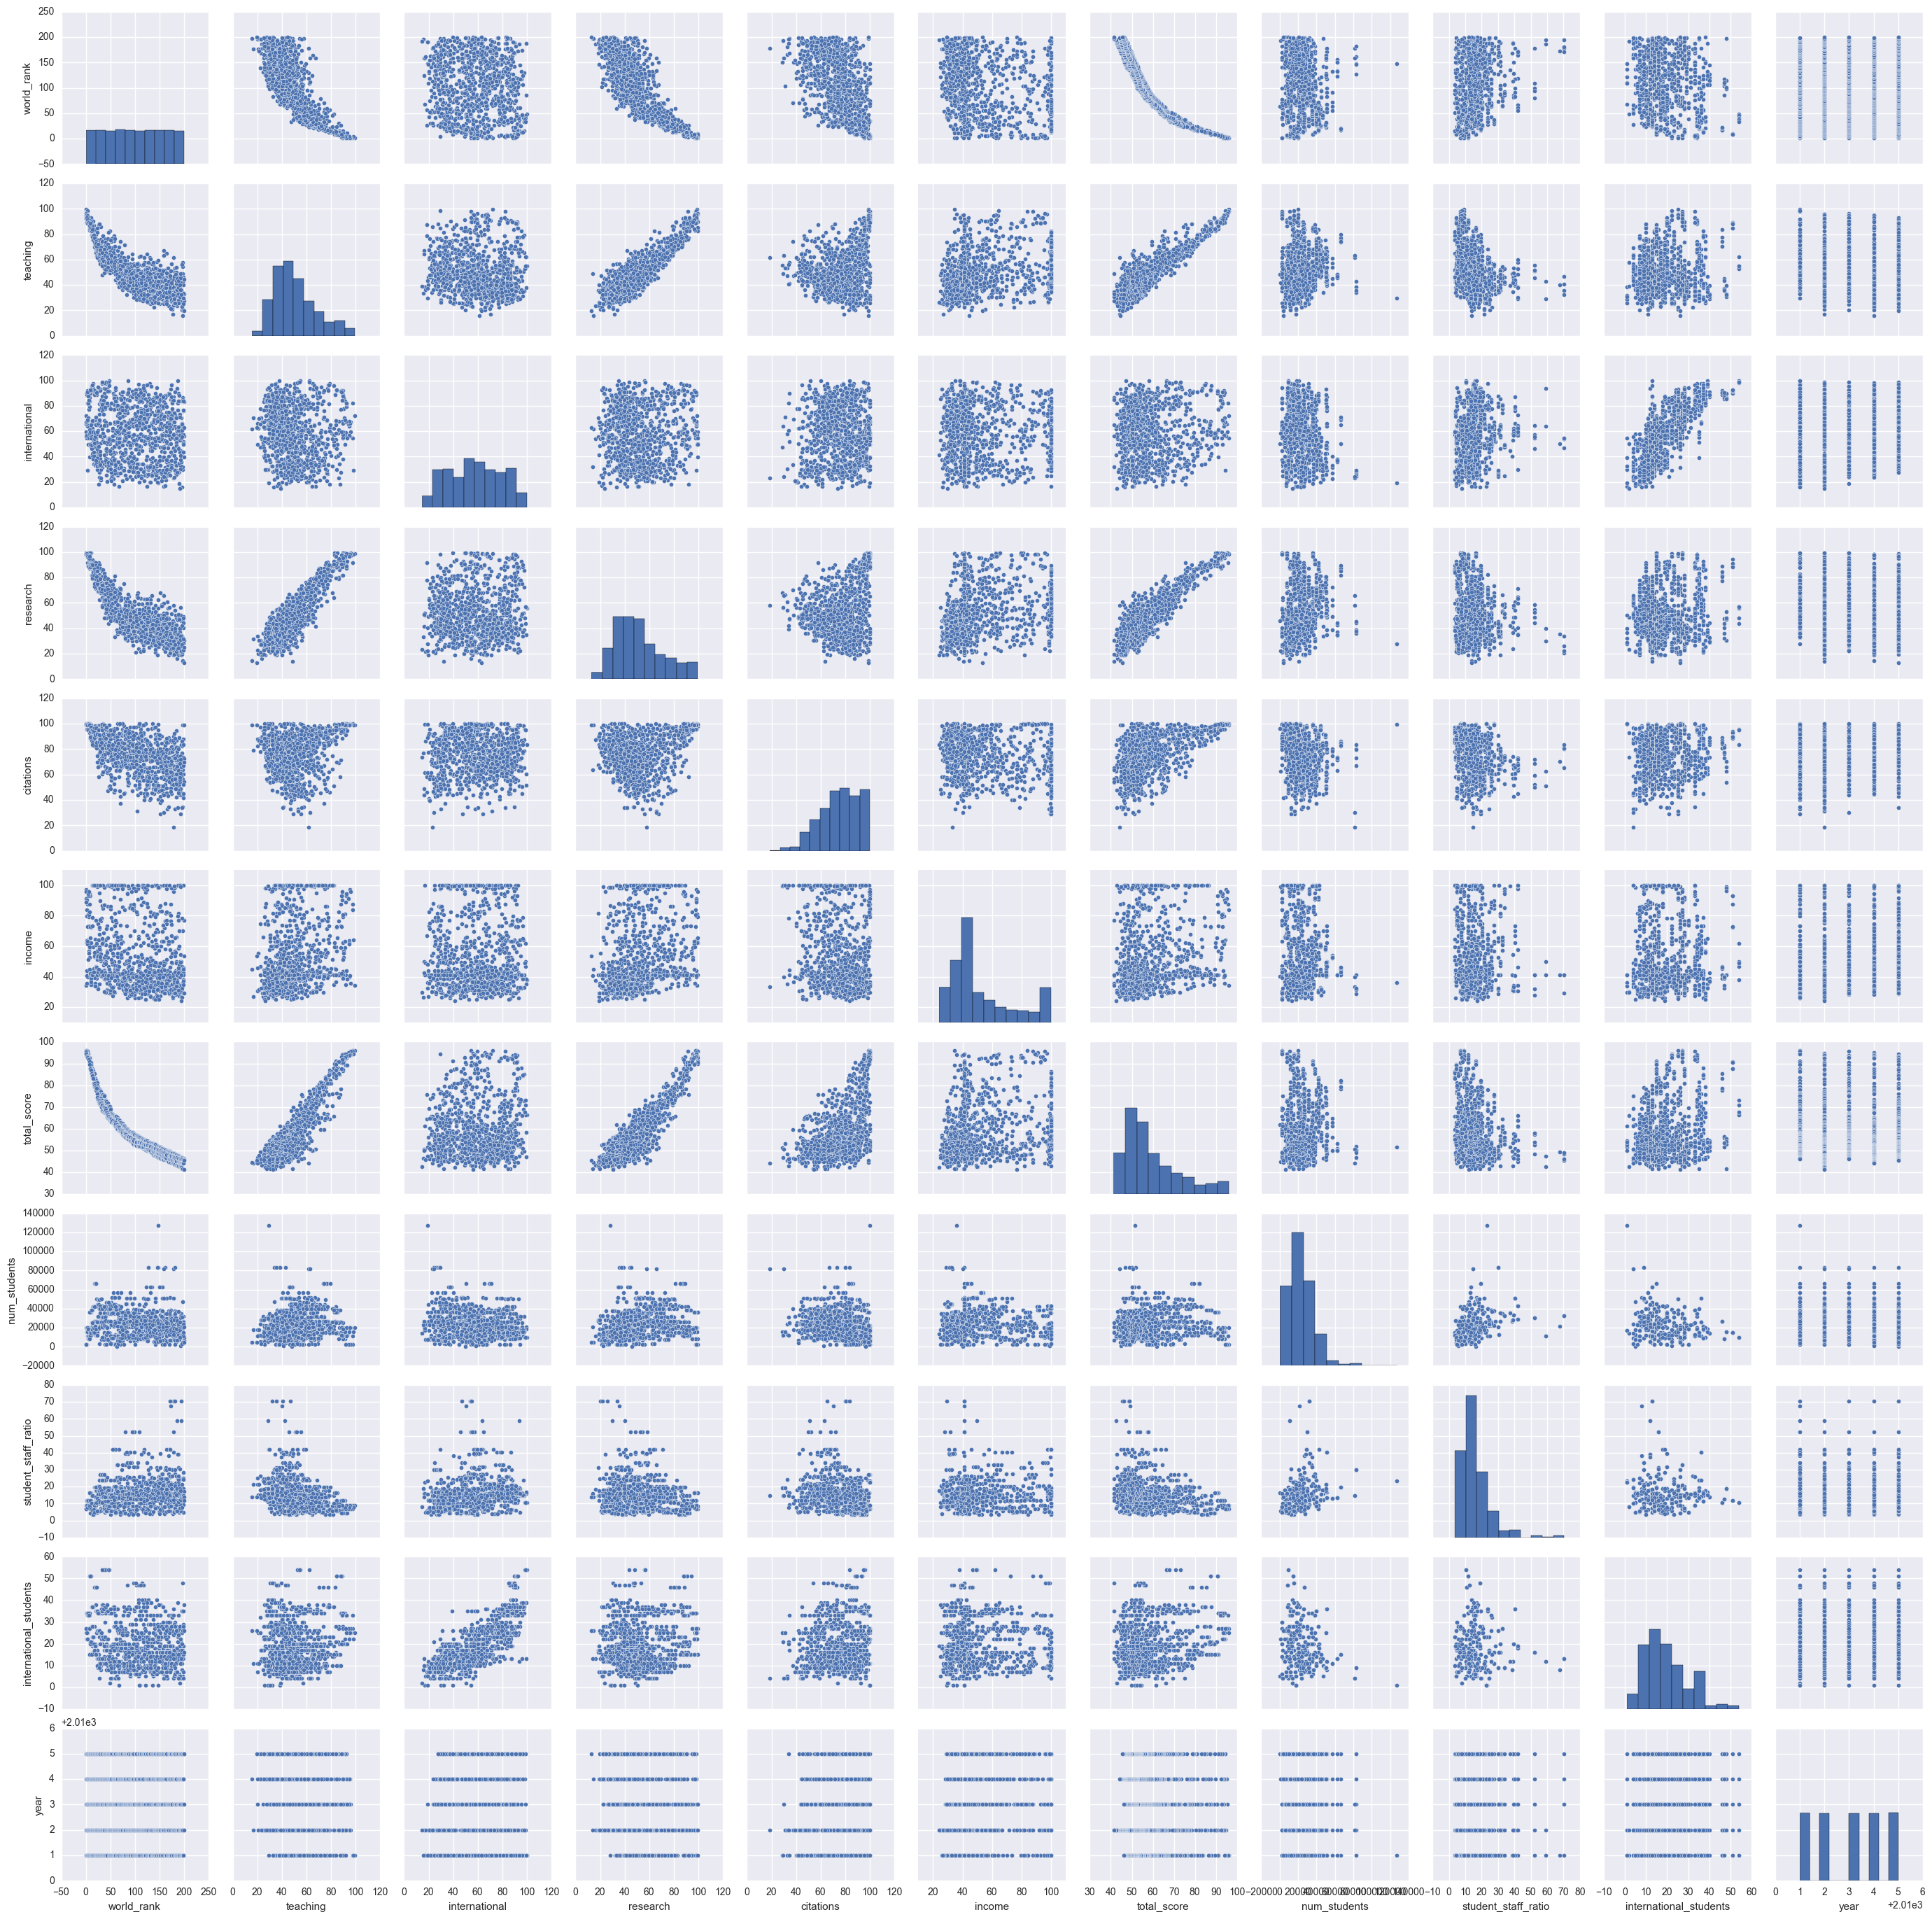

In [5]:
dfc = dfc[(dfc['total_score'] != '-') & (dfc['total_score'].notnull())]
dfc['total_score'] = dfc['total_score'].astype(float)
dfc.info()
sns.pairplot(dfc)

<class 'pandas.core.series.Series'>


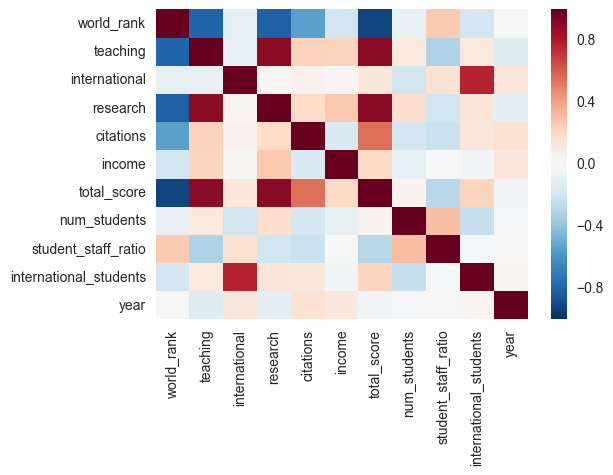

In [14]:
cols = ['total_score', 'world_rank','teaching', 'research', 'year']

df2 = dfc.copy()
dfc_X = df2[ (df2['total_score'].notnull())]

dfc_u_2016 = dfc.copy()
dfc_u_2016 = dfc_u_2016['university_name'][(dfc_u_2016['year'] == 2016)]
print type(dfc_u_2016)
dfc_train = dfc_X['total_score'].astype(float)
dfc_X.drop('total_score', axis=1, inplace=True)

dfc_X_2016 = df2[(df2['year'] == 2016)]
dfc_X_2016 =dfc_X_2016.drop('total_score', axis =1)

#print df2
sns.heatmap(df2.corr())

In [15]:
X = dfc_X
y =  dfc_train

lr = linear_model.LinearRegression()
lr_model = lr.fit(X,y)

y_pred = lr_model.predict(dfc_X_2016)
y_pred_df =  pd.DataFrame(y_pred)
pred = pd.Series(y_pred)


"""
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
estimator = SVR(kernel="linear")
selector = RFE(estimator, 5, step=1)
selector = selector.fit(X, y)
selector.support_ 
ranking = selector.ranking_
import matplotlib.pyplot as plt
plt.matshow(ranking, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()
"""


ValueError: invalid literal for float(): 56:44:00

In [25]:
new = pd.concat([dfc_u_2016, dfc_X_2016],axis=1)
new.reset_index(drop=True, inplace=True)

In [27]:
pred_df = pred.to_frame('pred_score')
result_df = pd.concat([new,pred_df], axis = 1)
#result_df

"""dfLeft.reset_index(inplace=True)
dfRight.reset_index(inplace=True)
dfMerged = pd.merge(dfLeft, dfRight,
              left_on=['date', 'cusip'],
              right_on=['date', 'idc__id'],
              how='inner')
"""
dfLeft = dfs
dfRight = result_df
dfMerged = pd.merge(dfLeft, dfRight,
              left_on=['university_name'],
              right_on=['university_name'],
              how='inner')
dfMerged.to_csv("/users/jfreeley/Desktop/university_preds_SKJP.csv")